# Force Alignment using HuggingFace

Finetuned hyperlocal languages on pretrained HuggingFace models, https://huggingface.co/mesolitica

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/force-alignment-huggingface](https://github.com/huseinzol05/malaya-speech/tree/master/example/force-alignment-huggingface).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

<div class="alert alert-warning">

Required Tensorflow >= 2.0 due to group convolution is not available for Tensorflow 1.
    
</div>

In [8]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import IPython.display as ipd
import matplotlib.pyplot as plt
from malaya_speech.utils.aligner import plot_alignments

### List available HuggingFace model

In [2]:
malaya_speech.force_alignment.available_huggingface()

,CER,CER-LM,Language,Size (MB),WER,WER-LM
mesolitica/wav2vec2-xls-r-300m-mixed,0.048105,0.041196,"[malay, singlish, mandarin]",1180,0.13222,0.098802


### Load HuggingFace model

```python
def huggingface(model: str = 'mesolitica/wav2vec2-xls-r-300m-mixed', **kwargs):
    """
    Load Finetuned models from HuggingFace. Required Tensorflow >= 2.0.

    Parameters
    ----------
    model : str, optional (default='mesolitica/wav2vec2-xls-r-300m-mixed')
        Model architecture supported. Allowed values:

        * ``'mesolitica/wav2vec2-xls-r-300m-mixed'`` - wav2vec2 XLS-R 300M finetuned on (Malay + Singlish + Mandarin) languages.

    Returns
    -------
    result : malaya_speech.model.huggingface.CTC class
    """
```

In [3]:
model = malaya_speech.force_alignment.huggingface(model = 'mesolitica/wav2vec2-xls-r-300m-mixed')

### Load sample

#### Malay samples

In [5]:
malay1, sr = malaya_speech.load('speech/example-speaker/shafiqah-idayu.wav')
malay2, sr = malaya_speech.load('speech/example-speaker/haqkiem.wav')

In [6]:
texts = ['nama saya shafiqah idayu',
        'sebagai pembangkang yang matang dan sejahtera pas akan menghadapi pilihan raya umum dan tidak menumbang kerajaan dari pintu belakang']

In [9]:
ipd.Audio(malay2, rate = sr)

#### Singlish samples

In [10]:
import json
import os
from glob import glob

with open('speech/imda/output.json') as fopen:
    data = json.load(fopen)
    
data

{'221931702.WAV': 'wantan mee is a traditional local cuisine',
 '221931818.WAV': 'ahmad khan adelene wee chin suan and robert ibbetson',
 '221931727.WAV': 'saravanan gopinathan george yeo yong boon and tay kheng soon'}

In [11]:
wavs = glob('speech/imda/*.WAV')
wavs

['speech/imda/221931727.WAV',
 'speech/imda/221931818.WAV',
 'speech/imda/221931702.WAV']

In [12]:
y, sr = malaya_speech.load(wavs[0])

In [13]:
ipd.Audio(y, rate = sr)

### Predict

```python
def predict(self, input, transcription: str, sample_rate: int = 16000):
    """
    Transcribe input, will return a string.

    Parameters
    ----------
    input: np.array
        np.array or malaya_speech.model.frame.Frame.
    transcription: str
        transcription of input audio.
    sample_rate: int, optional (default=16000)
        sample rate for `input`.
    Returns
    -------
    result: Dict[chars_alignment, words_alignment, alignment]
    """
```

#### Predict Malay

Our original text is: 'sebagai pembangkang yang matang dan sejahtera pas akan menghadapi pilihan raya umum dan tidak menumbang kerajaan dari pintu belakang'

In [14]:
results = model.predict(malay2, texts[1])

In [15]:
results.keys()

dict_keys(['chars_alignment', 'words_alignment', 'alignment'])

In [16]:
results['words_alignment']

[{'text': 'sebagai',
  'start': 0.06008348540145986,
  'end': 0.48066788321167886,
  'start_t': 3,
  'end_t': 24,
  'score': 0.33321882429577904},
 {'text': 'pembangkang',
  'start': 0.560779197080292,
  'end': 1.1015305656934307,
  'start_t': 28,
  'end_t': 55,
  'score': 0.4062712302914377},
 {'text': 'yang',
  'start': 1.1616140510948907,
  'end': 1.321836678832117,
  'start_t': 58,
  'end_t': 66,
  'score': 0.4999573007225997},
 {'text': 'matang',
  'start': 1.3819201642335768,
  'end': 1.7624489051094892,
  'start_t': 69,
  'end_t': 88,
  'score': 0.31554021333395593},
 {'text': 'dan',
  'start': 1.8425602189781023,
  'end': 1.9827550182481752,
  'start_t': 92,
  'end_t': 99,
  'score': 0.4285128627504628},
 {'text': 'sejahtera',
  'start': 2.0628663321167884,
  'end': 2.643673357664234,
  'start_t': 103,
  'end_t': 132,
  'score': 0.3079770515704987},
 {'text': 'pas',
  'start': 2.8439516423357665,
  'end': 3.084285583941606,
  'start_t': 142,
  'end_t': 154,
  'score': 0.2448273

#### Plot alignment

```python
def plot_alignments(
    alignment,
    subs_alignment,
    words_alignment,
    waveform,
    separator: str = ' ',
    sample_rate: int = 16000,
    figsize: tuple = (16, 9),
    plot_score_char: bool = False,
    plot_score_word: bool = True,
):
    """
    plot alignment.

    Parameters
    ----------
    alignment: np.array
        usually `alignment` output.
    subs_alignment: list
        usually `chars_alignment` or `subwords_alignment` output.
    words_alignment: list
        usually `words_alignment` output.
    waveform: np.array
        input audio.
    separator: str, optional (default=' ')
        separator between words, only useful if `subs_alignment` is character based.
    sample_rate: int, optional (default=16000)
    figsize: tuple, optional (default=(16, 9))
        figure size for matplotlib `figsize`.
    plot_score_char: bool, optional (default=False)
        plot score on top of character plots.
    plot_score_word: bool, optional (default=True)
        plot score on top of word plots.
    """
```

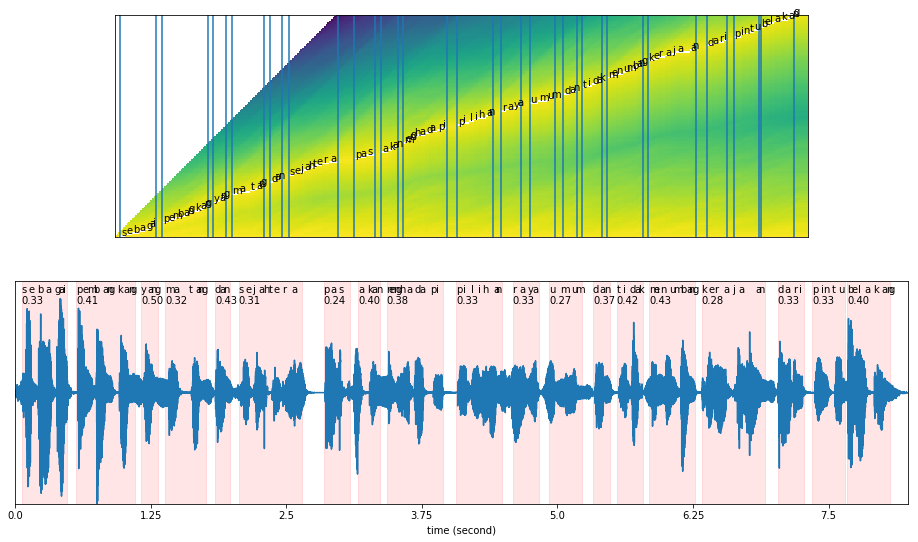

In [17]:
plot_alignments(alignment = results['alignment'],
                subs_alignment = results['chars_alignment'],
                words_alignment = results['words_alignment'],
                waveform = malay2,
                separator = ' ',
                sample_rate = 16000,
                figsize = (16, 9))

#### Predict Singlish

Our original text is: 'saravanan gopinathan george yeo yong boon and tay kheng soon'

In [19]:
results = model.predict(y, data[os.path.split(wavs[0])[1]])

In [20]:
results.keys()

dict_keys(['chars_alignment', 'words_alignment', 'alignment'])

In [21]:
results['words_alignment']

[{'text': 'saravanan',
  'start': 0.9011306532663317,
  'end': 1.7221608040201006,
  'start_t': 45,
  'end_t': 86,
  'score': 0.20384637175560008},
 {'text': 'gopinathan',
  'start': 1.822286432160804,
  'end': 2.783492462311558,
  'start_t': 91,
  'end_t': 139,
  'score': 0.18884456840754985},
 {'text': 'george',
  'start': 3.384246231155779,
  'end': 3.6846231155778897,
  'start_t': 169,
  'end_t': 184,
  'score': 0.3984322985014053},
 {'text': 'yeo',
  'start': 3.8247989949748744,
  'end': 4.125175879396985,
  'start_t': 191,
  'end_t': 206,
  'score': 0.19766120513289195},
 {'text': 'yong',
  'start': 4.225301507537688,
  'end': 4.465603015075377,
  'start_t': 211,
  'end_t': 223,
  'score': 0.3175081213315543},
 {'text': 'boon',
  'start': 4.745954773869347,
  'end': 5.046331658291457,
  'start_t': 237,
  'end_t': 252,
  'score': 0.26191766659420873},
 {'text': 'and',
  'start': 5.747211055276382,
  'end': 5.907412060301508,
  'start_t': 287,
  'end_t': 295,
  'score': 0.374943286

In [22]:
results['chars_alignment']

[{'text': 's',
  'start': 0.9011306532663317,
  'end': 0.9612060301507538,
  'start_t': 45,
  'end_t': 48,
  'score': 0.32403753201189517},
 {'text': 'a',
  'start': 0.9612060301507538,
  'end': 1.0613316582914574,
  'start_t': 48,
  'end_t': 53,
  'score': 0.1617213726046411},
 {'text': 'r',
  'start': 1.0613316582914574,
  'end': 1.1214070351758794,
  'start_t': 53,
  'end_t': 56,
  'score': 0.32714577515921056},
 {'text': 'a',
  'start': 1.1214070351758794,
  'end': 1.2615829145728643,
  'start_t': 56,
  'end_t': 63,
  'score': 0.13863982473116593},
 {'text': 'v',
  'start': 1.2615829145728643,
  'end': 1.3216582914572865,
  'start_t': 63,
  'end_t': 66,
  'score': 0.31008976697925844},
 {'text': 'a',
  'start': 1.3216582914572865,
  'end': 1.481859296482412,
  'start_t': 66,
  'end_t': 74,
  'score': 0.12218087166559971},
 {'text': 'n',
  'start': 1.481859296482412,
  'end': 1.5819849246231157,
  'start_t': 74,
  'end_t': 79,
  'score': 0.19260255098444917},
 {'text': 'a',
  'start

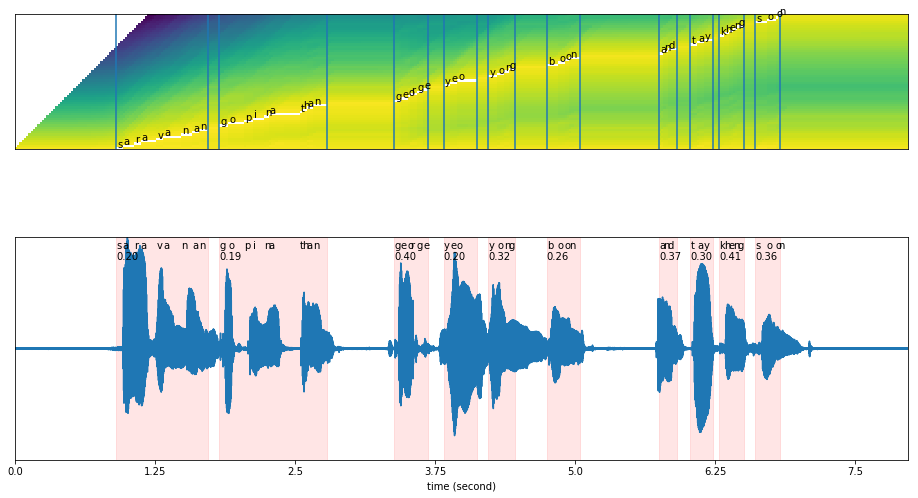

In [23]:
plot_alignments(alignment = results['alignment'],
                subs_alignment = results['chars_alignment'],
                words_alignment = results['words_alignment'],
                waveform = y,
                separator = ' ',
                sample_rate = 16000,
                figsize = (16, 9))

### What if we give wrong transcription?

In [24]:
results = model.predict(y, 'husein sangat comel')

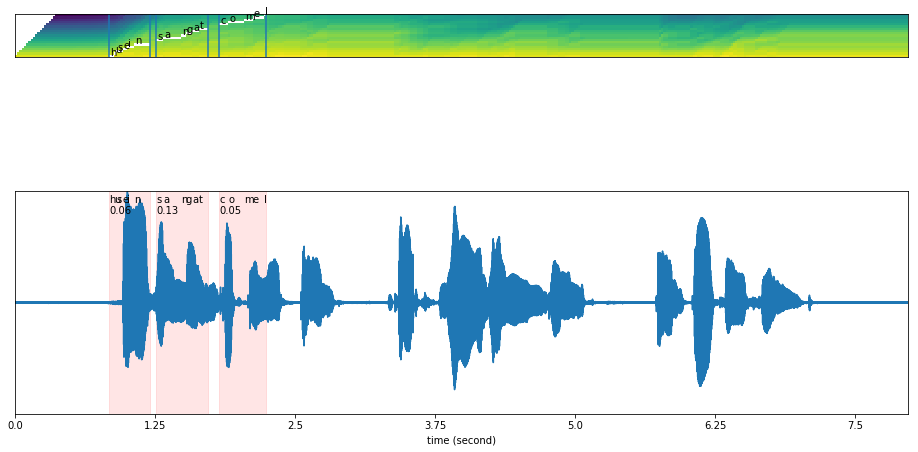

In [25]:
plot_alignments(alignment = results['alignment'],
                subs_alignment = results['chars_alignment'],
                words_alignment = results['words_alignment'],
                waveform = y,
                separator = ' ',
                sample_rate = 16000,
                figsize = (16, 9))

**The text output not able to align, and returned scores very low**.